<a href="https://colab.research.google.com/github/yamini1998m/-ML-Regression-ProjectTemplate.ipynb/blob/main/ML_Regression_ProjectTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Retail Sales Prediction





```

```

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Project Name**    -Retail Sales Prediction
##### **Member** - Yamini Mehendwariya

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/yamini1998m/-ML-Regression-ProjectTemplate.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats



### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
store_data=pd.read_csv('/content/drive/MyDrive/store.csv')
rosemaan_data=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_data.head()

<ipython-input-3-ae69a59a0649>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rosemaan_data=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
rosemaan_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
store_data.shape



(1115, 10)

We came to know that store data contains 1115 values and 10 features

In [6]:
rosemaan_data.shape

(1017209, 9)

we see here that rosemaan dataset consists 1017209 values and 10 features

### Dataset Information

In [7]:
# Dataset Info
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
rosemaan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
store_data.duplicated().sum()

0

We See here ,there are no duplicate value in this data set


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many null values in these columns:- CompetitionOpenSinceMonth ,CompetitionOpenSinceYear,Promo2sinceWeek,Promo2SinceYear,PromoInterval

and also CompetitionDistance have 3 null values .

we have to clear it.



# 1.   **CompetitionDistance**





In [11]:
store_data[pd.isnull(store_data['CompetitionDistance'])]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


To fill up these null values there are so many ways like(0,mean,median,mode).We have to replace these null values by median

In [12]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)

In [13]:
store_data['CompetitionDistance'].isnull().sum()

0



# 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'




There are not much information provided to these data. Also we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [14]:
ds=store_data.copy()

In [15]:
## code for replacing Nan values with 0.

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
ds['CompetitionOpenSinceMonth'] = ds['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
ds['CompetitionOpenSinceYear'] = ds['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
ds['Promo2SinceWeek'] = ds['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
ds['Promo2SinceYear'] = ds['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
ds['PromoInterval'] = ds['PromoInterval'].fillna(0)

## Now checking Nan values
ds.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

Answer Here
        There are two datasets are given from which we have to predict jtheir daily sales for upto six weeks.

1.   Rossmann Stores Data.csv - historical data including Sales
                    It has  1017209 entries and 9 columns and here there is no null values in any entry.
2.   store.csv - supplemental information about the stores
                    It has 1115 entries and 10 variables and here there is some null values but we treat that values with mean,median,mode and 0 .
                    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'



# Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [16]:
ds_final=pd.merge(rosemaan_data,ds,on='Store',how='left')
ds_final.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [17]:
ds_final.shape

(1017209, 18)

# **3. Data Wrangling**

# **Changing different dtypes to int type.**

In [18]:
# code for changing StateHoliday dtype from object to int.
ds_final.loc[ds_final['StateHoliday'] == '0', 'StateHoliday'] = 0
ds_final.loc[ds_final['StateHoliday'] == 'a', 'StateHoliday'] = 1
ds_final.loc[ds_final['StateHoliday'] == 'b', 'StateHoliday'] = 2
ds_final.loc[ds_final['StateHoliday'] == 'c', 'StateHoliday'] = 3
ds_final['StateHoliday'] = ds_final['StateHoliday'].astype(int, copy=False)

print('levels :', ds_final['StateHoliday'].unique(), '; data type :', ds_final['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [19]:
# code for changing Assortment dtype from object to int.
ds_final.loc[ds_final['Assortment'] == 'a', 'Assortment'] = 0
ds_final.loc[ds_final['Assortment'] == 'b', 'Assortment'] = 1
ds_final.loc[ds_final['Assortment'] == 'c', 'Assortment'] = 2
ds_final['Assortment'] = ds_final['Assortment'].astype(int, copy=False)

print('levels :', ds_final['Assortment'].unique(), '; data type :', ds_final['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [20]:
# code for changing StoreType dtype from object to int.
ds_final.loc[ds_final['StoreType'] == 'a', 'StoreType'] = 0
ds_final.loc[ds_final['StoreType'] == 'b', 'StoreType'] = 1
ds_final.loc[ds_final['StoreType'] == 'c', 'StoreType'] = 2
ds_final.loc[ds_final['StoreType'] == 'd', 'StoreType'] = 3
ds_final['StoreType'] = ds_final['StoreType'].astype(int, copy=False)

print('levels :', ds_final['StoreType'].unique(), '; data type :', ds_final['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [21]:
# code for changing format of date from object to datetime
ds_final['Date'] = pd.to_datetime(ds_final['Date'], format= '%Y-%m-%d')

In [22]:
ds_final['CompetitionOpenSinceYear']= ds_final['CompetitionOpenSinceYear'].astype(int)
ds_final['Promo2SinceYear']= ds_final['Promo2SinceYear'].astype(int)

In [23]:
ds_final['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(ds_final['Date']).month

In [24]:
ds_final['CompetitionDistance']= ds_final['CompetitionDistance'].astype(int)
ds_final['Promo2SinceWeek']= ds_final['Promo2SinceWeek'].astype(int)

## ***2. Understanding Your Variables***

In [25]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [26]:
# Dataset Columns
ds_final.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [27]:
# Dataset Describe
ds_final.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,1.207467e+00,9.351412e-01,5.422021e+03,5.846762e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,1.365376e+00,9.938011e-01,7.706918e+03,3.326097e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,6.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,8.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### Variables Description


*   Id - an Id that represents a (Store, Date) duple within the test set
*  Store - a unique Id for each store
*   Sales - the turnover for any given day (this is what you are predicting)
*   Customers - the number of customers on a given day

*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*   StoreType - differentiates between 4 different store models: a, b, c, d

*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor store

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

*   Promo - indicates whether a store is running a promo on that day

*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

























### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
for i in ds_final.columns:
   print(i,ds_final[i].unique())

Store [   1    2    3 ... 1113 1114 1115]
DayOfWeek [5 4 3 2 1 7 6]
Date ['2015-07-31T00:00:00.000000000' '2015-07-30T00:00:00.000000000'
 '2015-07-29T00:00:00.000000000' '2015-07-28T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-26T00:00:00.000000000'
 '2015-07-25T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-21T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-19T00:00:00.000000000' '2015-07-18T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-12T00:00:00.000000000'
 '2015-07-11T00:00:00.000000000' '2015-07-10T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-04T00:00:00.000000000'
 '2015-07-03T00:0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Sales**

#### Chart - 1

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

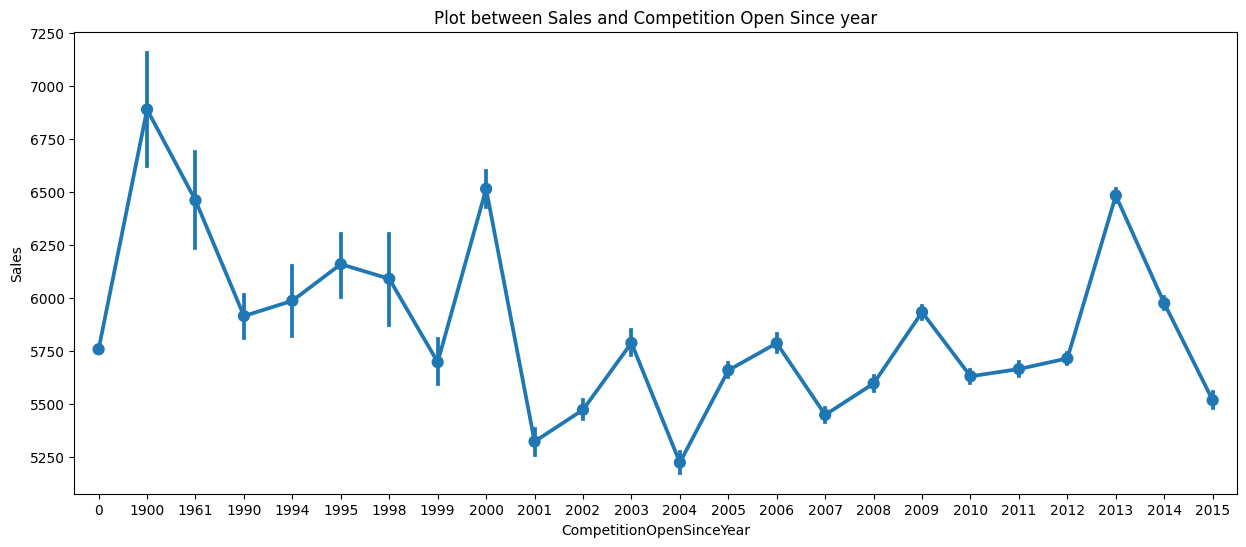

In [29]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

#### Chart - 2

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

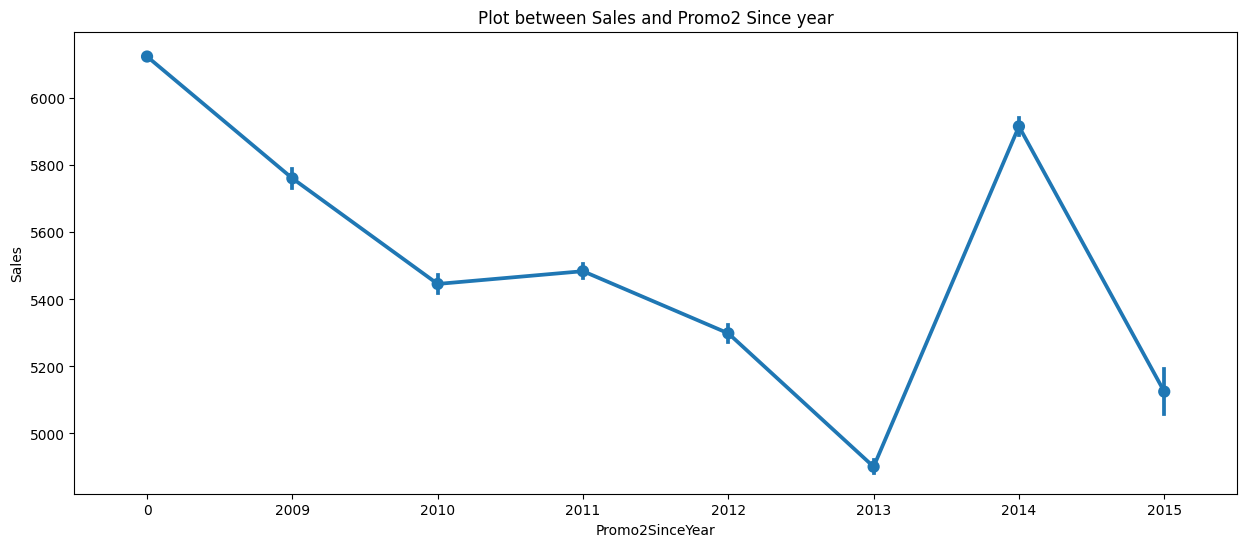

In [30]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

#### Chart - 3

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

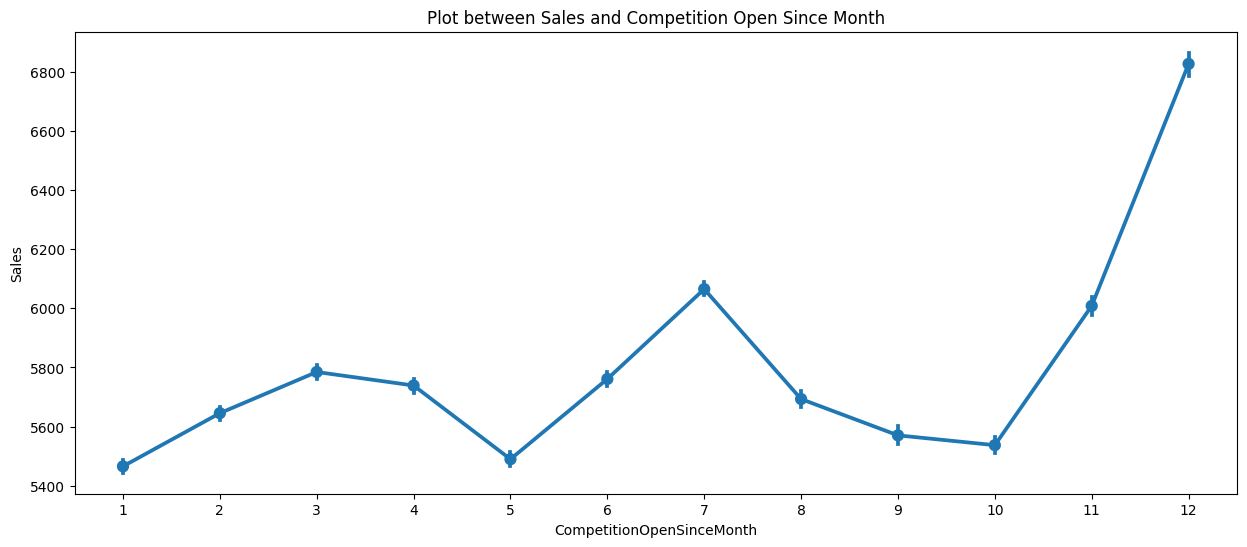

In [31]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

#### Chart - 4

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

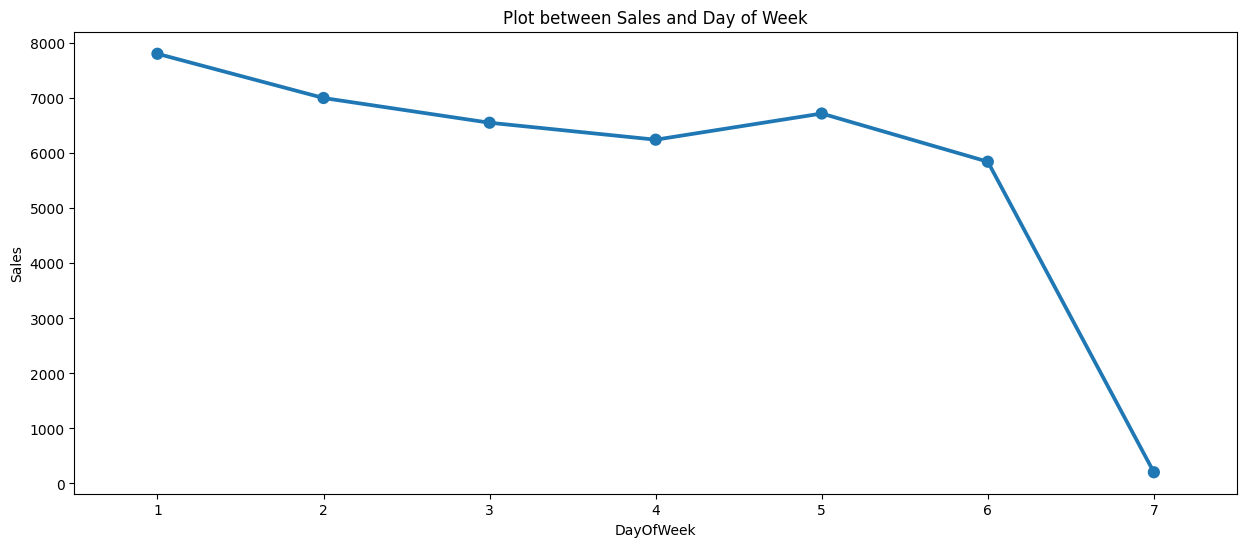

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.